## Demo for modelling single-channel PSF from bead data

#### Setup environment

In [8]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
main_data_dir = io.param.load('datapath.yaml').main_data_dir
try:
    gpus = tf.config.list_physical_devices('GPU')
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print('Running on GPU')
except:
    print('Running on CPU')

Running on GPU


#### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{psftype}}$:  `'voxel', 'zernike'`  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_user')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine('config_base',psftype='zernike',channeltype='1ch',sysfile='M2')


#### Edit user defined parameters

In [3]:
L.param.datapath = main_data_dir+'/1ch_40nm_bead/'
L.param.savename = L.param.datapath+'psfmodel'
L.param.keyword = 'Pos' # keyword for your data file
L.param.subfolder = 'Pos' # keyword for subfolder name if each data file is saved in a individual folder, set to '' if no subfolder
L.param.gain = 0.22
L.param.ccd_offset = 400
L.param.FOV.z_step = 1  
L.param.pixel_size.z = 0.05 # micron, equal to z_step*stepsize_of_the_data
L.param.roi.max_bead_number = 20 
L.param.roi.bead_radius = 0.025
L.param.batch_size = 30 # lower this number if out of memory
L.param.option.imaging.emission_wavelength = 0.6 # micron


#### Start learning

In [5]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
for k in range(0,1): # increase iteration number if necessary
    psfobj,fitter = L.learn_psf(dataobj,time=0)
resfile = L.save_result(psfobj,dataobj,fitter)

E:/EMBL files/data for PSF learning/example data for uiPSF//1ch_40nm_bead\Pos0_40nm_bead_50nm_Z_1\Pos0_40nm_bead_50nm_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data for PSF learning/example data for uiPSF//1ch_40nm_bead\Pos10_40nm_bead_50nm_Z_1\Pos10_40nm_bead_50nm_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data for PSF learning/example data for uiPSF//1ch_40nm_bead\Pos11_40nm_bead_50nm_Z_1\Pos11_40nm_bead_50nm_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data for PSF learning/example data for uiPSF//1ch_40nm_bead\Pos12_40nm_bead_50nm_Z_1\Pos12_40nm_bead_50nm_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data for PSF learning/example data for uiPSF//1ch_40nm_bead\Pos13_40nm_bead_50nm_Z_1\Pos13_40nm_bead_50nm_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data for PSF learning/example data for uiPSF//1ch_40nm_bead\Pos14_40nm_bead_50nm_Z_1\Pos14_40nm_bead_50nm_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data for PSF learning/example data for uiPSF//1ch_40nm_bead\Pos15_40nm_bead_50nm_Z_1\Pos15_40nm_bead

3/6: learning: 161/250 [00:17s]  9.00it/s, current loss: 0.13794, total time: 17.88s
4/6: calculating spline coefficients: 1/1 [00:02s]  2.21s/it total time: 20.08s
5/6: localization: 4/4 [00:00s] 10.13it/s total time: 20.48s


outlier id: [7]
rois shape channel : (19, 39, 25, 25)


3/6: learning: 106/250 [00:11s]  9.17it/s, current loss: 0.13781, total time: 32.03s
4/6: calculating spline coefficients: 1/1 [00:02s]  2.19s/it total time: 34.22s
5/6: localization: 4/4 [00:00s] 10.06it/s total time: 34.61s
6/6: saving results: [00:04s] total time: 39.09s


#### Show results

In [6]:
f,p = io.h5.load(resfile) # load result file

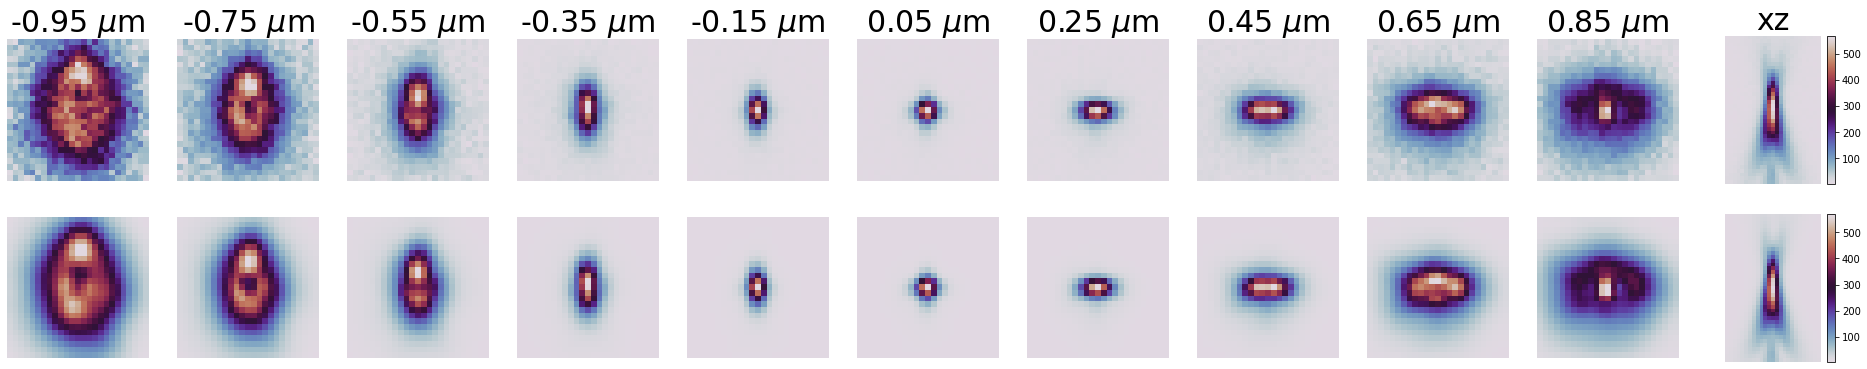

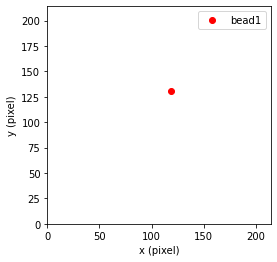

In [7]:
showpsfvsdata(f,p,index=1)

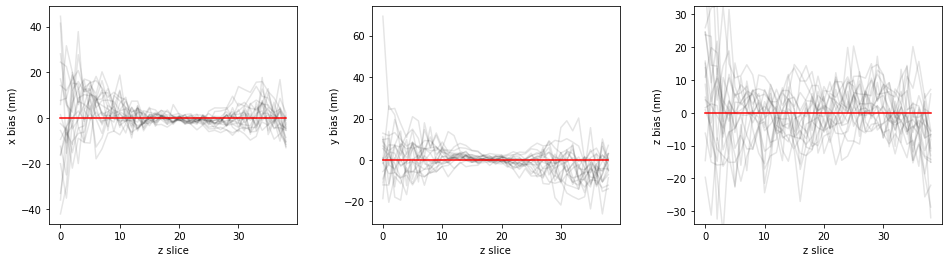

In [8]:
showlocalization(f,p)

#### Optional plots

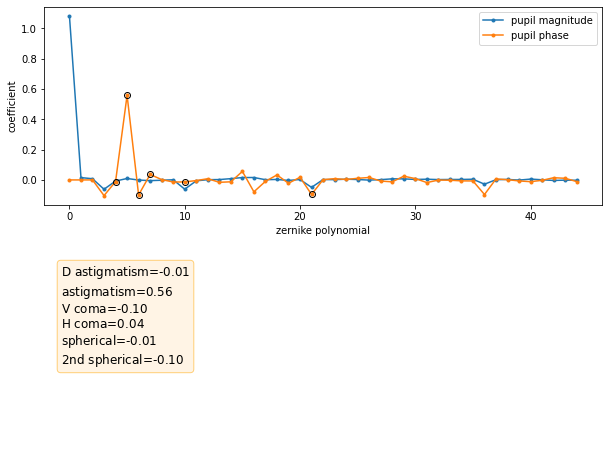

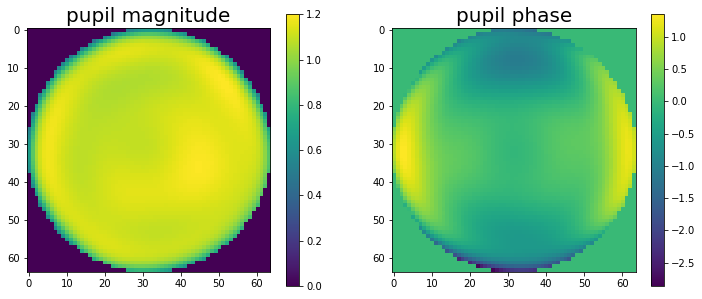

In [9]:
try:
    showzernike(f,p)
except:
    try: 
        showpupil(f,p)
    except:
        print('no pupil')

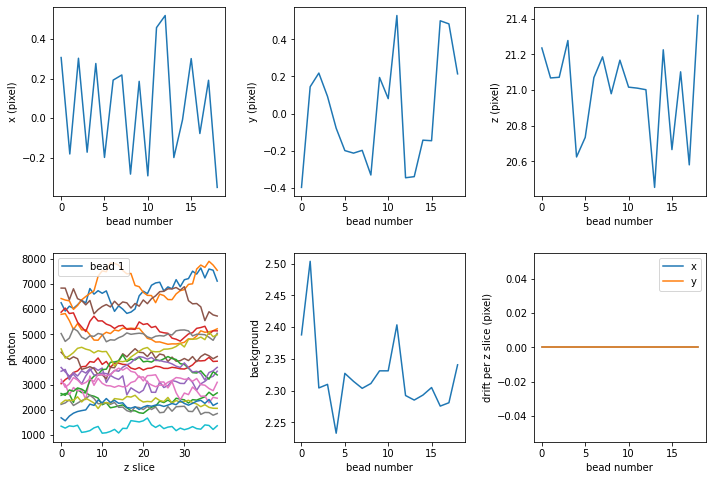

In [10]:
showlearnedparam(f,p)

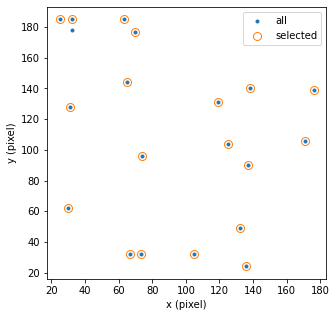

In [14]:
showcoord(f,p)

#### Ouput parameters

In [16]:
print('f:\n    ',list(f.keys()))
print(' locres:\n    ',list(f.locres.keys()))
print(' res:\n    ',list(f.res.keys()))
print(' rois:\n    ',list(f.rois.keys()))

f:
     ['locres', 'res', 'rois']
 locres:
     ['CRLB', 'LL', 'P', 'coeff', 'coeff_bead', 'coeff_reverse', 'loc']
 res:
     ['I_model', 'I_model_bead', 'I_model_reverse', 'apodization', 'bg', 'cor', 'cor_all', 'drift_rate', 'intensity', 'offset', 'pos', 'pupil', 'sigma', 'zernike_coeff', 'zernike_polynomial']
 rois:
     ['cor', 'fileID', 'image_size', 'psf_data', 'psf_fit']
